CONTENTS

<B>Linear Discriminant Analysis</B>
1. [Select the dataset](#select)
2. [Preprocessing](#preprocess)
3. [Standardization of features](#std)
4. [Building the LDA Model](#lda)
5. [Transformation of the data](#trans)
6. [Visualization of the transformed data](#viz)

<B>Locally Linear Embedding</B>
1. [Building the model](#bldg)
2. [Visualization of the transformed data](#vis)

# Linear Discriminant Analysis


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id = select></a>
## Select the dataset

In [2]:
wine = pd.read_csv('wine.csv')

In [3]:
wine

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


<a id = preprocess></a>
## Preprocessing

In [4]:
X = wine.drop(['Wine'], axis = 1)
X

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
y = wine['Wine']
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

In [5]:
X.shape

(178, 13)

In [7]:
y.shape

(178,)

<a id = std></a>
## Stardardise the features

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_scaled = sc.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [9]:
X_scaled.shape

(178, 13)

<a id = lda></a>
## Building the LDA Model

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
y.unique

<bound method Series.unique of 0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64>

In [13]:
# n_components ==> min(n_classes-1, n_features)
#              ==> min(3-1, 13)
#              ==> = 2, the dimension of the hyperplane onto which we want to project

lda = LinearDiscriminantAnalysis(n_components = 2)

<a id = trans></a>
## Transformation of the data

In [14]:
X_lda = lda.fit_transform(X_scaled, y)

In [15]:
X_lda

array([[ 4.70024401,  1.97913835],
       [ 4.30195811,  1.17041286],
       [ 3.42071952,  1.42910139],
       [ 4.20575366,  4.00287148],
       [ 1.50998168,  0.4512239 ],
       [ 4.51868934,  3.21313756],
       [ 4.52737794,  3.26912179],
       [ 4.14834781,  3.10411765],
       [ 3.86082876,  1.95338263],
       [ 3.36662444,  1.67864327],
       [ 4.80587907,  2.23536271],
       [ 3.42807646,  2.17510939],
       [ 3.66610246,  2.26248961],
       [ 5.58824635,  2.05478773],
       [ 5.50131449,  3.61304865],
       [ 3.18475189,  2.88952528],
       [ 3.28936988,  2.76584266],
       [ 2.99809262,  1.42511132],
       [ 5.24640372,  3.70982655],
       [ 3.13653106,  1.97689922],
       [ 3.57747791,  0.5624599 ],
       [ 1.69077135,  0.91342136],
       [ 4.83515033,  0.9147628 ],
       [ 3.09588961,  0.61735888],
       [ 3.32164716,  0.29847734],
       [ 2.14482223,  0.16369247],
       [ 3.9824285 ,  2.17515679],
       [ 2.68591432,  1.21850924],
       [ 3.56309464,

In [16]:
X_lda.shape

(178, 2)

<a id = viz></a>
## Visualization of the transformed data

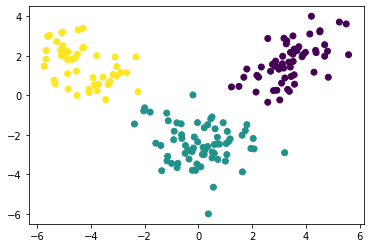

In [18]:
plt.scatter(X_lda[:,0], X_lda[:,1], c=y);

# Locally Linear Embedding

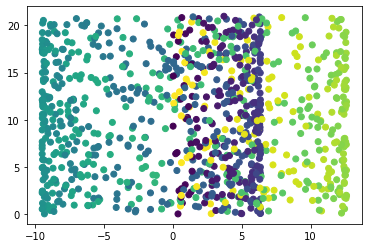

In [33]:
from sklearn.datasets import make_swiss_roll
X, y = make_swiss_roll(n_samples = 1000, random_state = 100)
plt.scatter(X[:, 0], X[:, 1], c = y)

<a id = bldg></a>
## Building the model

In [34]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_neighbors = 10, n_components = 2)

<a id = transform></a>
## Tranforming the data

In [35]:
X_lle = lle.fit_transform(X)
X_lle

array([[ 0.00035015, -0.05156004],
       [-0.02608528, -0.01033138],
       [-0.01085643,  0.00057976],
       ...,
       [-0.03429512,  0.06344983],
       [-0.04373699,  0.03406452],
       [ 0.00769719, -0.01836894]])

<a id = vis></a>
## Visualization of transformed data

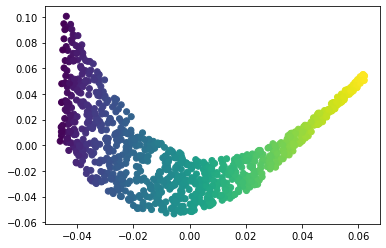

In [36]:
plt.scatter(X_lle[:, 0], X_lle[:, 1], c = y)